Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149


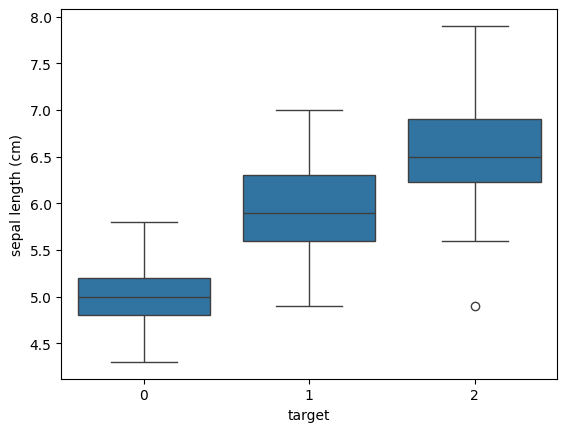

In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import ttest_ind, ttest_rel

# Load Dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 1. EDA
print(df.describe())
print(df.info())
print(df.isnull().sum())

# 2. Plots to Try
sns.boxplot(x='target', y='sepal length (cm)', data=df)
plt.show()

## Box plot
Q1---Median-----Q3

 |-----|--------|---
 
 ### Right-Skewed (Positive Skewness)
-> If the median is closer to Q1 and the right whisker is longer than the left whisker, the distribution is right-skewed. This means there are more values concentrated on the lower end and fewer on the higher end.

-> It means the mean > median; This can help identify outliers or extreme values in the data. For right-skewed data, values far above Q3 (upper whisker) might be considered outliers, while for left-skewed data, values far below Q1 (lower whisker) might be considered outliers.

-> For Model selection, ex linear regression expects normal distribution of data. We can use data transformation tech to transform the data into Normal distribution. 

-> Common transformations for right-skewed data include logarithmic, square root, or Box-Cox transformations.

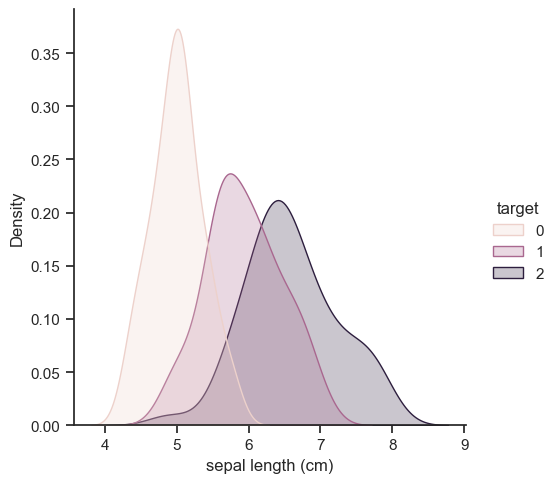

In [23]:
# 2. Plots to Try
# sns.kdeplot(data = df['sepal length (cm)'])
sns.displot(df, x="sepal length (cm)", hue="target", fill=True, kind='kde')

In [24]:
# apply log transform
import numpy as np
data = df[df.target == 1]['sepal length (cm)']
log_data = np.log(data)


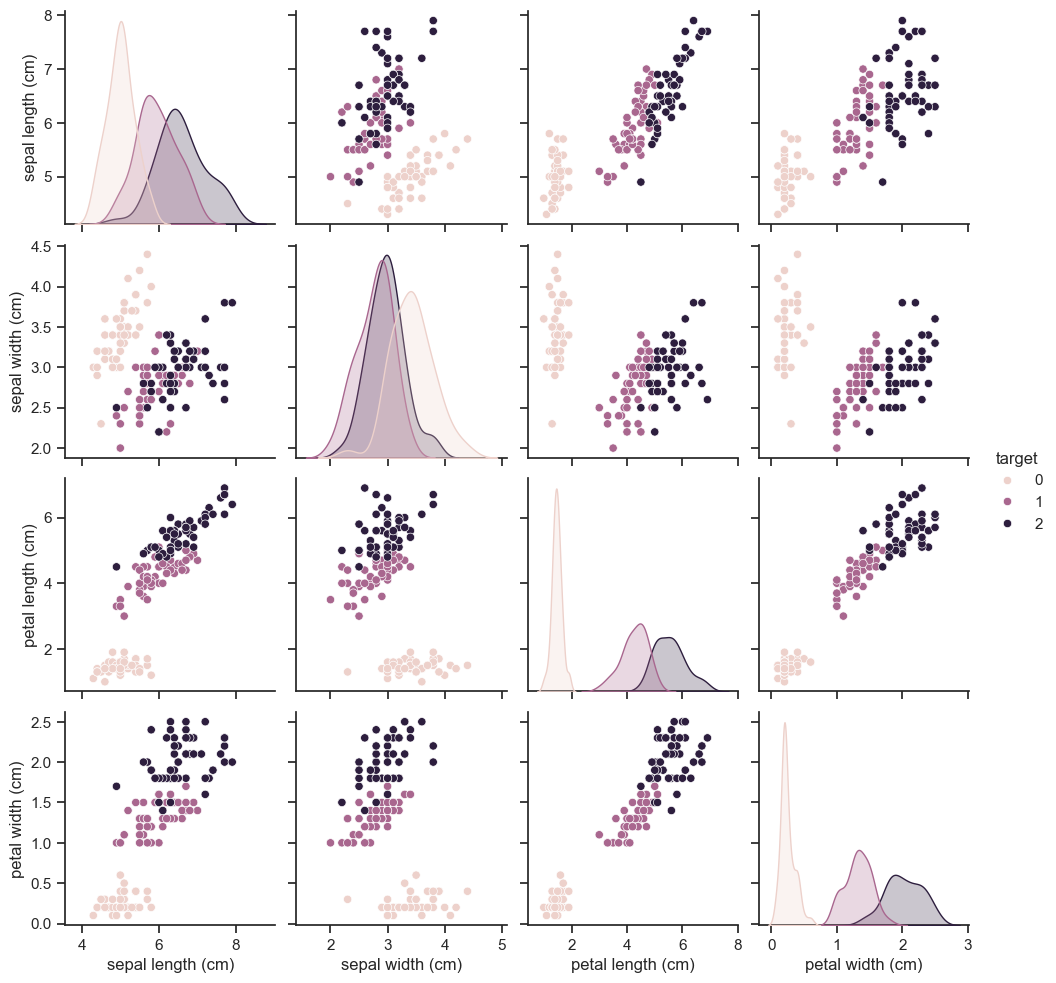

In [7]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue="target")

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


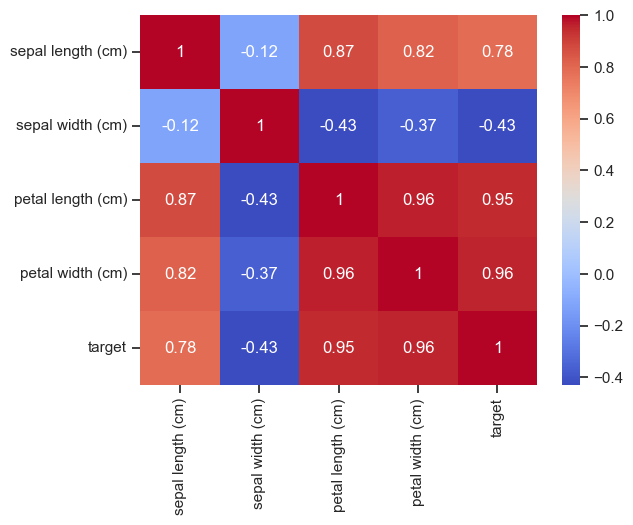

In [8]:
# Detect Multicollinearity - since we assume all variables are independent, having multicollinear features cases issues.
correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9]:
# applying t test 
setosa = df[df['target'] == 0]['petal length (cm)']
versicolor = df[df['target'] == 1]['petal length (cm)']
# Perform a two-sample t-test
t_stat, p_value = ttest_ind(setosa, versicolor)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


T-Statistic: -39.492719391538095
P-Value: 5.404910513441677e-62


In [15]:
from scipy.stats import ttest_ind, levene
t_stat, p_value = ttest_ind(versicolor, setosa)
stat, p_value_levene = levene(setosa, versicolor)

print(f"Levene's Test Statistic: {stat}")
print(f"Levene's Test P-Value: {p_value_levene}")

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


Levene's Test Statistic: 30.49950629474208
Levene's Test P-Value: 2.7443023022053794e-07
T-Statistic: 39.492719391538095
P-Value: 5.404910513441677e-62


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
# from sklearn.inspection import plot_partial_dependence
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
# from lazypredict.Supervised import LazyRegressor

In [37]:
from lazypredict.Supervised import LazyRegressor

ImportError: cannot import name '_is_pandas_na' from 'sklearn.utils' (/Users/Srikanth/myOrg/projects/openAI_learning/openai_env/lib/python3.12/site-packages/sklearn/utils/__init__.py)

In [36]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 12.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-1.2.2-cp312-cp312-macosx_10_9_universal2.whl size=15107108 sha256=5efc7bf921238a1924671ef4269d3051dd8e06848afed2e823746d5c35811c78
  Stored in directory: /Users/Srikanth/Library/Caches/pip/wheels/24/f8/77/ae90c181b806f450a6fec8c8f794594e7c92fa79d7ca27e656
Successfully built scikit-learn
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires scikit-learn>1.4.0, but you have scikit-learn 1.2.2 which is incompatible.

[notice] A new release of pip i

In [39]:
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

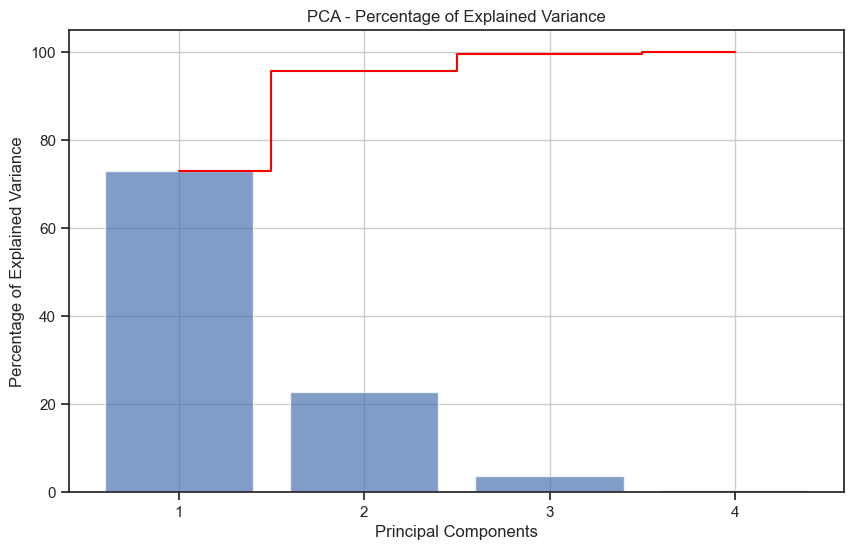

In [40]:
explained_variance = pca.explained_variance_ratio_

# Plot the percentage of explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance * 100), where='mid', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variance')
plt.title('PCA - Percentage of Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()